In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# 1

## functions

In [196]:
def calculate_distance(x1,x2,y1,y2):
  return math.sqrt((x1 - x2)**2 + (y1-y2)**2)

def find_centroids(nodes):
    return np.mean(nodes, axis = 0)

def calculate_SSE(centroid, nodes):
    x_dis = (centroid[0]-nodes[:, 0])**2
    y_dis = (centroid[1]-nodes[:, 1])**2
    return np.sum(x_dis) + np.sum(y_dis)


def my_kmeans(k,max_iter,x,y):
    centroid = dict()
    assignment = np.zeros(len(x))
    total_cendroids = dict()
    sse = []
    for i in range(k):
        ind = np.random.randint(len(x))
        centroid[i] = [x[ind], y[ind]]
    
    for i in range(max_iter):
        # assign each node to a cluster
        for j in range(len(x)):
            min_dist = calculate_distance(x[j],centroid[0][0], y[j], centroid[0][1])
            assignment[j] = 0
            for m in range(k):
                current_dist = calculate_distance(x[j],centroid[m][0], y[j], centroid[m][1])
                if current_dist <min_dist:
                    min_dist = current_dist
                    assignment[j] = m
        # calculating centroids
        current_sse = 0
        for m in range(k):
            cluster_nodes = []
            for j in range(len(x)):
                if assignment[j] == m:
                    cluster_nodes.append([x[j], y[j]])
            current_centroid = find_centroids(cluster_nodes)
            centroid[m] = current_centroid
            current_sse += calculate_SSE(np.array(current_centroid), np.array(cluster_nodes))
        sse.append(current_sse)
        
        total_cendroids[i] = centroid.copy()

    list_centroid = list(centroid.values())
    return assignment, total_cendroids, list_centroid, sse


## Finding the optimum number of clusters (k) using elbow method

In [165]:
def elbow(input_dataset, title = ''):
    dataset1 = input_dataset.copy()
    centroids = dict()
    distances = dict()
    total_error = dict()
    for k in range(1, 15):
        kmeans_assignment, kmeans_centroid, kmeans_centroid_list, total_sse = my_kmeans(k, 15+k, dataset1['X'], dataset1['Y'])
        dataset1['labels'+str(k)] = kmeans_assignment
        centroids[k] = np.array(kmeans_centroid_list)
        for j in range(k):
            sel = dataset1.loc[dataset1['labels'+str(k)] == j]
            dataset1[j] = np.sqrt((sel['X']-centroids[k][j][0])**2 + (sel['Y'] - centroids[k][j][1])**2)
            dataset1[j] = dataset1[j].fillna(0)
        dataset1['c_dist'+str(k)] = dataset1.iloc[:, 3+(k-1)*2:].sum(axis = 1)
        distances[k] = dataset1.groupby('labels'+str(k)).mean()['c_dist'+str(k)]
        dataset1.drop(dataset1.iloc[:, 3+(k-1)*2:-1], inplace = True, axis = 1) 
        total_error[k] = distances[k].mean()

#     print(dataset1)
    plt.plot(list(total_error.keys()), list(total_error.values()), 
            linewidth = 3, 
            marker='o', markerfacecolor='blue', markersize=8)
    plt.xlabel('k')
    plt.ylabel('clustering error')
    plt.title(title)
    plt.show()


## reading datasets

In [166]:
dataset_1 = pd.read_csv('./HW4_ML/q1-data/data_kmeans_1.txt', header = None, names=['X', 'Y'])
dataset_2 = pd.read_csv('./HW4_ML/q1-data/data_kmeans_2.txt', header = None, names=['X', 'Y'])
dataset_3 = pd.read_csv('./HW4_ML/q1-data/data_kmeans_3.txt', header = None, names=['X', 'Y'])


## drawing elbow plots

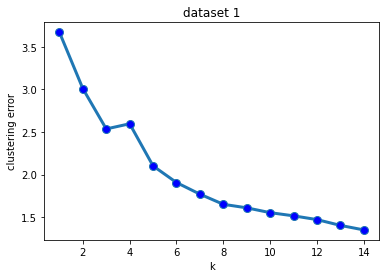

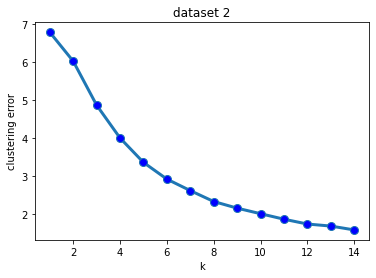

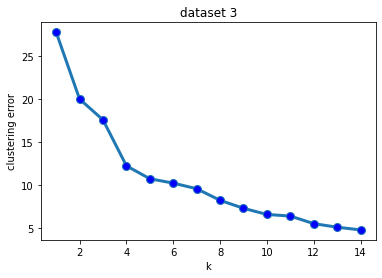

In [167]:
elbow(dataset_1.copy(), title = 'dataset 1')
elbow(dataset_2.copy(), title = 'dataset 2')
elbow(dataset_3.copy(), title = 'dataset 3')

In [45]:
optimum_k = [3, 4, 4]

## Generating clustering plots such as centroids changes, node labels and SSE errors

In [194]:
def kmeans_output_on_dataset(input_dataset, input_k, input_colors, input_dataset_name):
    assignment, total_centroids, final_centroid, total_sse = my_kmeans(input_k, 15+input_k, input_dataset['X'], input_dataset['Y'])
    
    # showing labels
    input_dataset['km_labels'] = assignment
    plt.scatter(input_dataset['X'], input_dataset['Y'], c = input_dataset['km_labels'].map(input_colors))
    plt.title(f'kmeans on {input_dataset_name} and k = {input_k}')
    plt.show()
    
    # plotting cluster centroids
    centroid_x, centroid_y, size = [], [], []
    for i in range(15+input_k):
        current_centroids = total_centroids[i]
        list_current_centroids = np.array(list(current_centroids.values()))
        plt.scatter(list_current_centroids[:, 0], list_current_centroids[:, 1], label = i+1)
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('centroids per iteration')
    plt.legend(title = 'iteration colors', bbox_to_anchor=(1.05, 1),loc='upper left')
    plt.show()
    
    #plotting SSE error
    plt.plot(list(range(len(total_sse))), total_sse, 
            linewidth = 3, 
            marker='o', markerfacecolor='blue', markersize=8)
    plt.xlabel('iteration')
    plt.ylabel('SSE error')
    plt.title(f'SSE error for {input_dataset_name} with k={input_k}')
    plt.show()
    

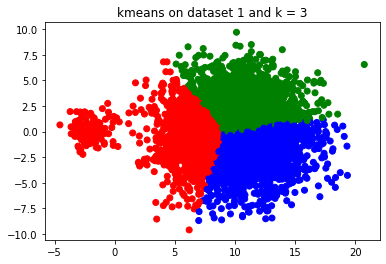

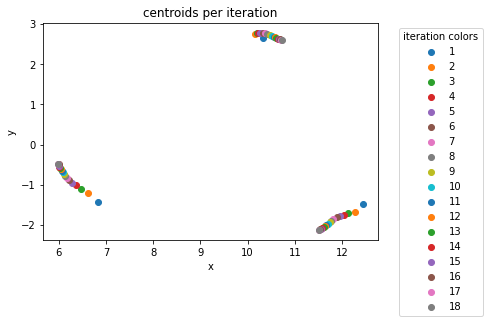

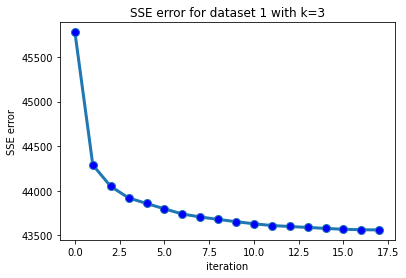

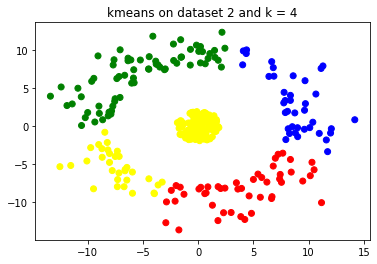

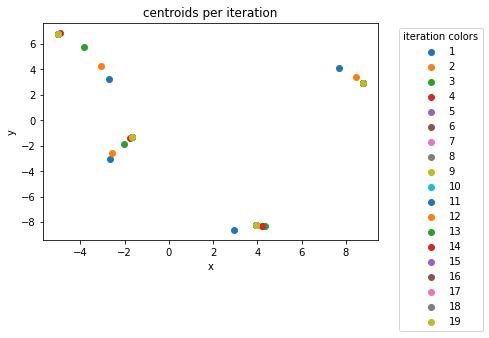

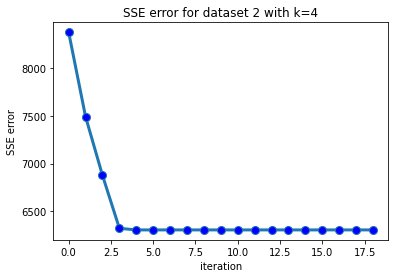

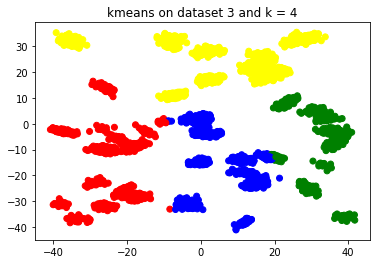

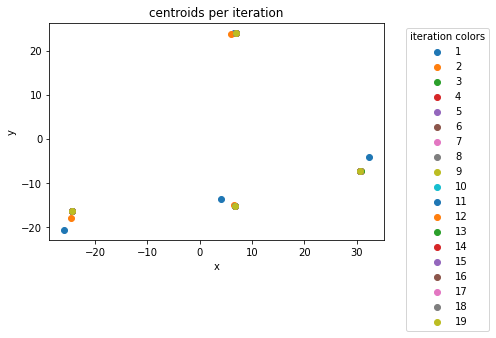

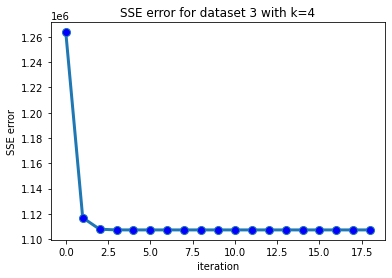

In [199]:
kmeans_output_on_dataset(dataset_1.copy(), optimum_k[0], {0:'blue', 1:'red', 2:'green'}, "dataset 1")
kmeans_output_on_dataset(dataset_2.copy(), optimum_k[1], {0:'blue', 1:'red', 2:'green', 3:'yellow'}, "dataset 2")
kmeans_output_on_dataset(dataset_3.copy(), optimum_k[2], {0:'blue', 1:'red', 2:'green', 3:'yellow'}, "dataset 3")

# 2

## Reading datasets

In [202]:
q2_dataset_1 = pd.read_csv('./HW4_ML/q2-data/Compound.txt', sep='\t', header=None, names=['x', 'y', 'cluster'])
q2_dataset_2 = pd.read_csv('./HW4_ML/q2-data/D31.txt', sep='\t', header=None, names=['x', 'y', 'cluster'])
q2_dataset_3 = pd.read_csv('./HW4_ML/q2-data/spiral.txt', sep='\t', header=None, names=['x', 'y', 'cluster'])
print(q2_dataset_3.head)

<bound method NDFrame.head of          x      y  cluster
0    31.95   7.95        3
1    31.15   7.30        3
2    30.45   6.65        3
3    29.70   6.00        3
4    28.90   5.55        3
..     ...    ...      ...
307  15.75  13.85        2
308  15.65  14.05        2
309  15.65  14.25        2
310  15.65  14.50        2
311  15.65  14.60        2

[312 rows x 3 columns]>


## DBSCAN and purity score calculator functions

In [345]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
import matplotlib.cm as cm

def my_dbscan(input_eps, input_min_samples, input_dataset):
    clustering = DBSCAN(eps=input_eps, min_samples=input_min_samples).fit(input_dataset[['x', 'y']])
    input_dataset['final_labels'] = clustering.labels_
#     print(input_dataset.groupby('final_labels').count())
    return input_dataset

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

## Drawing clustering plots with different color for each label

In [346]:
def generate_q2_output(input_eps, input_min_pts, input_dataset, input_dataset_name):
    out_dataset = my_dbscan(input_eps, input_min_pts, input_dataset.copy())

#     colors_dic = {0: 'blue', 1: 'red', 2:'green', 3:'yellow', 4: 'purple',
#                   -1: 'black'}

    colors = cm.rainbow(np.linspace(0, 1, 40))

    plt.scatter(out_dataset['x'], out_dataset['y'], c = out_dataset['final_labels'], cmap='turbo')
    plt.title(f'DBSCAN clustering rsult for {input_dataset_name}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

    print(f'purity score for {input_dataset_name}: {purity_score(out_dataset["cluster"], out_dataset["final_labels"])}')

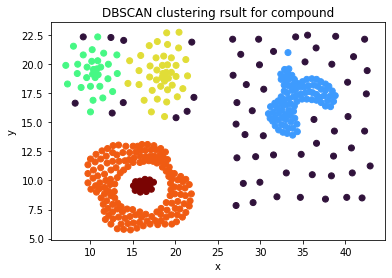

purity score for compound: 0.9699248120300752


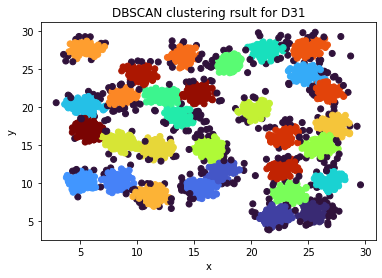

purity score for D31: 0.8764516129032258


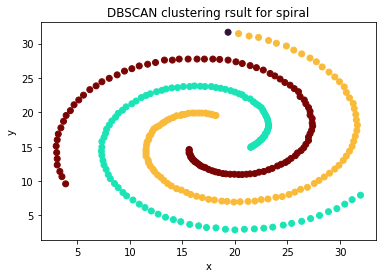

purity score for spiral: 1.0


In [347]:
generate_q2_output(1.5, 4, q2_dataset_1, 'compound')
generate_q2_output(0.6, 12, q2_dataset_2, 'D31')
generate_q2_output(2, 5, q2_dataset_3, 'spiral')

# 3

In [362]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

## Reading dataset

In [356]:
q3_dataset = pd.read_excel('./HW4_ML/q3-data/data_h.xlsx', header=None, names=['X', 'Y'])

## Drawing dendogram plots

In [403]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    childs = model.children_

    for i, merge in enumerate(childs):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    
#     print(linkage_matrix.shape)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

## Agglomerative clustering function

In [532]:
def agglomerative(input_dataset, input_linkages, thresholds, dendogram_levels, number_of_clusters=2):
#     colors = ['red', 'blue', 'yellow', 'purple', 'green', 'orange', 'black', 'grey', 'pink', 'brown']
    for i, linkage in enumerate(input_linkages):
        clustering = AgglomerativeClustering(n_clusters = number_of_clusters,
                                             linkage = linkage, compute_distances=True).fit(input_dataset)
        
        plt.title(f'Bottom-up Clustering Dendrogram for {linkage} linkage')
        # plot the top three levels of the dendrogram
        plot_dendrogram(clustering, truncate_mode='lastp', p=dendogram_levels)
        plt.xlabel("Number of points in node (or index of point if no parenthesis).")
        plt.axhline(y=thresholds[i])
        plt.show()
        
        for i in range (2, 9):
            agc = AgglomerativeClustering(n_clusters = i, linkage=linkage)
            plt.scatter(input_dataset['X'], input_dataset['Y'], c = agc.fit_predict(input_dataset), cmap ='rainbow')
            plt.title(f'Agglomerative clustering with {i} clusters and {linkage}-link linkage')
            plt.show()
        

## Running the agglomerative clustering with single-link, complete-link and average-link distances on the dataset

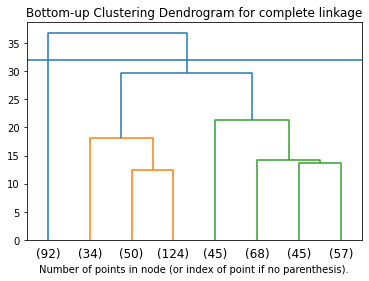

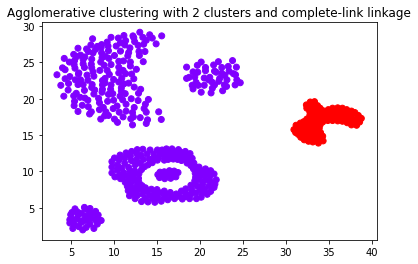

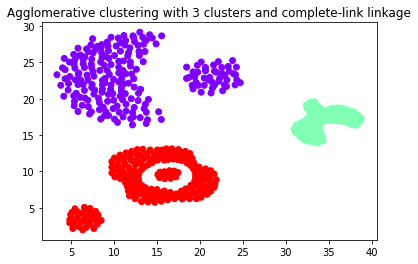

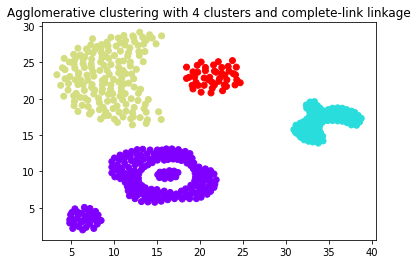

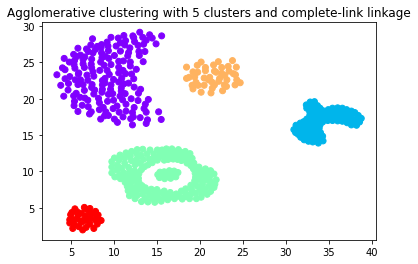

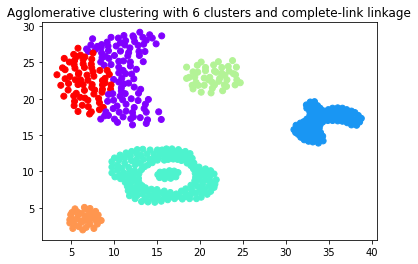

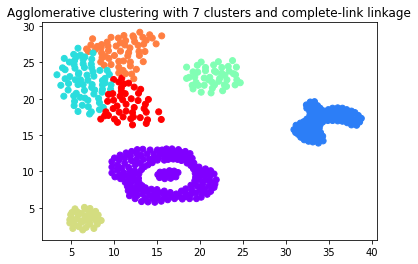

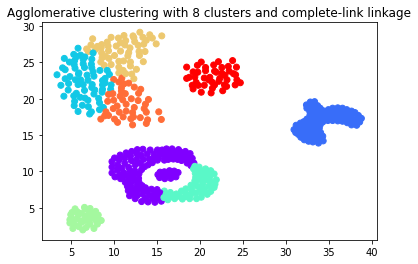

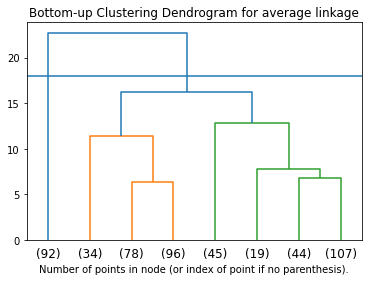

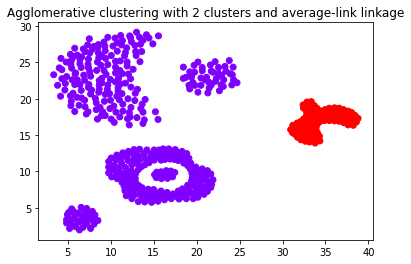

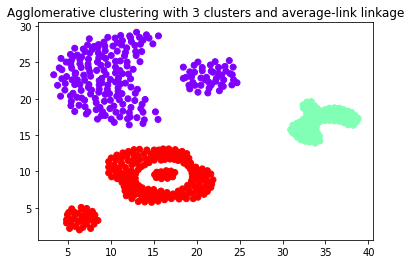

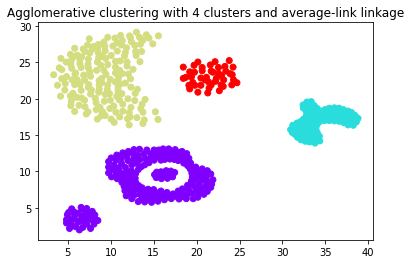

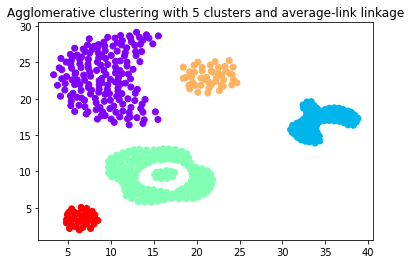

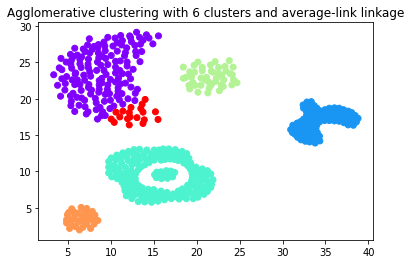

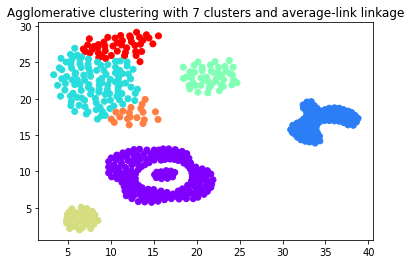

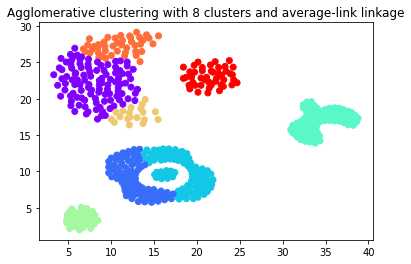

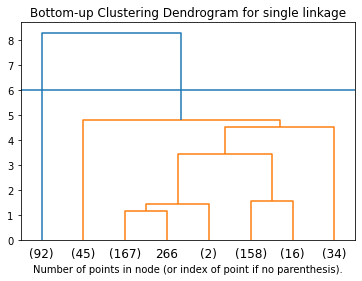

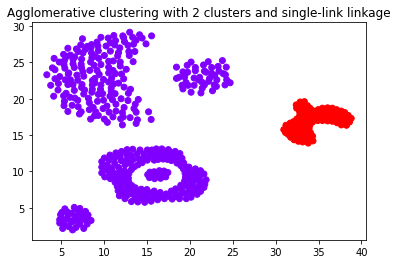

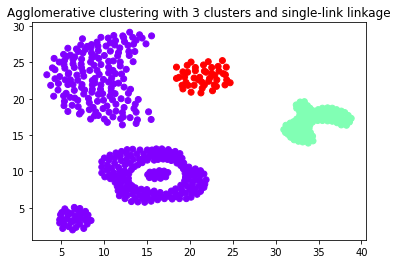

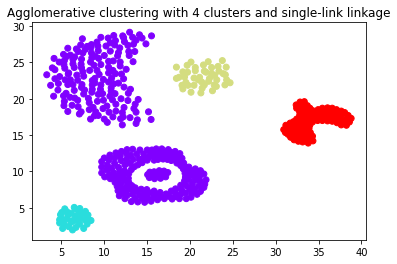

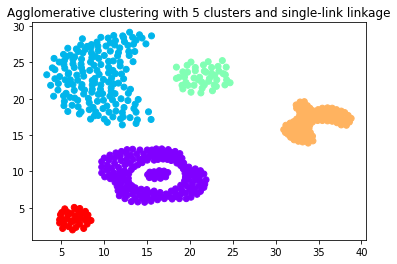

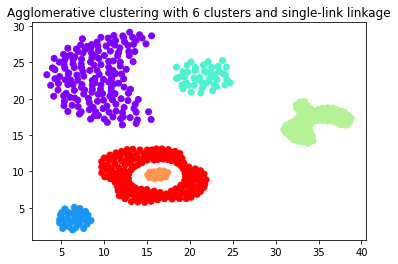

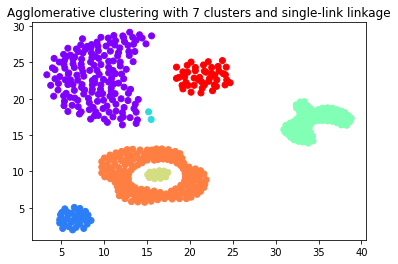

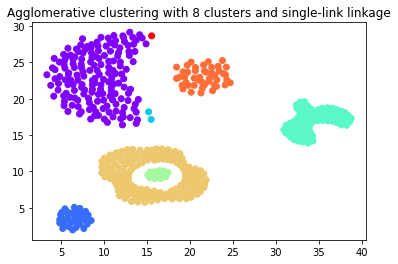

In [533]:
agglomerative(q3_dataset, ['complete', 'average', 'single'], [32, 18, 6], 8, 2)

## The effect of distance methods:
According to the plots, the single-link plots contains clusters in which adjacent nodes have minimum distances but there are some nodes (for example in the purple cluster) that are on the same cluster but have large distances. Moreover there are some clusters with one or two nodes which is not ideal.
whereas in complete-link and average-link plots, there is no cluster with a few nodes and there are not any two pair nodes in a cluster that have large distances. 
The results in complete-link and average link plots are almost the same and since there is no outlier (as it seems) in the dataset, the complete-link method works fine and returns an acceptable result, like the average-link method.

## 3.b

In [462]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

## Divisive clustering using K-Means as a subroutine clustering method

### Calculating distances of two clusters according to the given distance method

In [497]:
def calculate_linkage_score(inp_type, nodes_1, nodes_2):
    if inp_type == 'single':
        d = cdist(nodes_1, nodes_2)
        return np.min(d)
    elif inp_type == 'complete':
        d = cdist(nodes_1, nodes_2)
        return np.max(d)
    elif inp_type == 'average':
        d = cdist(nodes_1, nodes_2)
        return np.mean(d)
    
    print('bad req')
    return 'bad type'




### Finding the optimum cluster to divide which generates two clusters with maximum distances

In [516]:
def find_cluster_to_divide(inp_clusters, inp_type):
    mini = 0
    optimum_labels = []
    optimum_cluster = []
    scores = []
    total_labels = []
    models = []
    new_clusters = []
    for cluster in inp_clusters:
        kmeans = KMeans(n_clusters=2, random_state=0).fit(cluster)
        current_labels = kmeans.labels_
        nodes_1 = np.array([x for i, x in enumerate(cluster) if current_labels[i]==1])
        nodes_2 = np.array([x for i, x in enumerate(cluster) if current_labels[i]==0])
        current_score = calculate_linkage_score(inp_type, nodes_1, nodes_2)
        scores.append(current_score)
#         total_labels.append(current_labels)
        if current_score > mini:
            mini = current_score
            optimum_labels = current_labels
            optimum_cluster = cluster
            new_clusters = [nodes_1.tolist(), nodes_2.tolist()]
    return optimum_cluster, optimum_labels, new_clusters
      

### An iterative function that divides the optimum cluster in each step until the number of clusters reaches eight

In [524]:

def top_down_clustering(nodes, inp_type):
    clusters = [nodes.copy()]
    while len(clusters) < 8:
        split_cluster, split_labels, new_clusters = find_cluster_to_divide(clusters.copy(), inp_type)
#         if len(clusters) == 7:
#             print(clusters)
#             print(split_cluster)
#             print('umad')
#             return
        clusters.remove(split_cluster)
        clusters += new_clusters
        
        ## plot
        for i, cluster in enumerate(clusters):
        
            np_cluster = np.array(cluster)
            plt.scatter(np_cluster[:,0], np_cluster[:, 1], label = i+1)
        plt.legend()
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(f'clustering with {len(clusters)} clusters and  {inp_type}link linkage')
        plt.show()

## Running the divisive clustering function with the three cited distance methods on the dataset

[+] clustering with single-link linkage




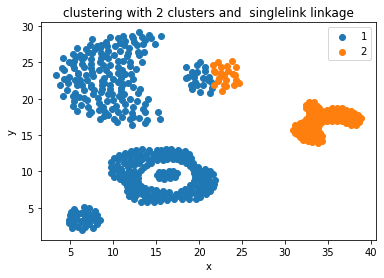

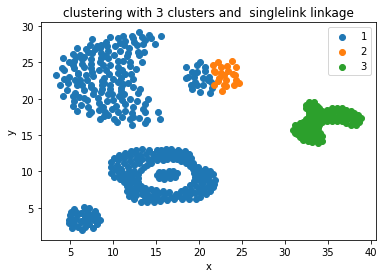

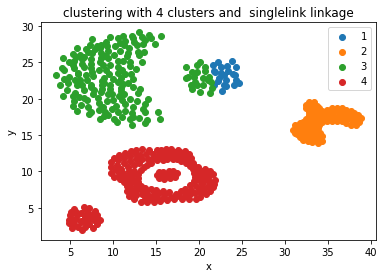

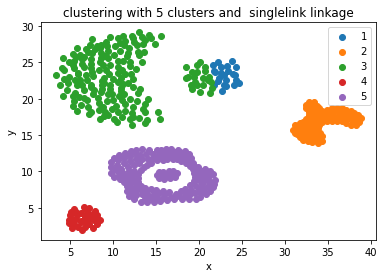

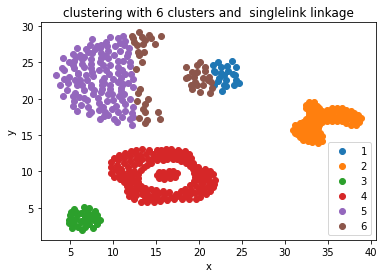

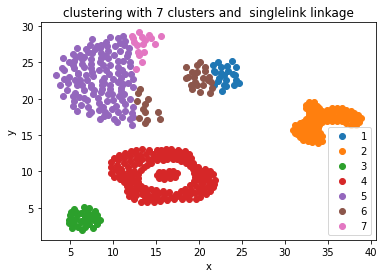

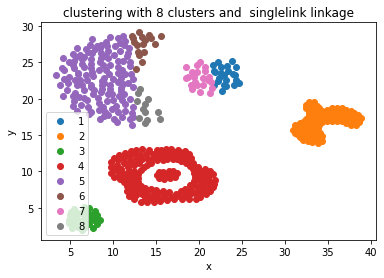

[+] clustering with average-link linkage




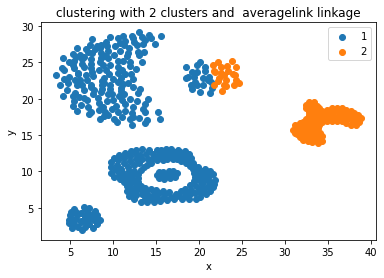

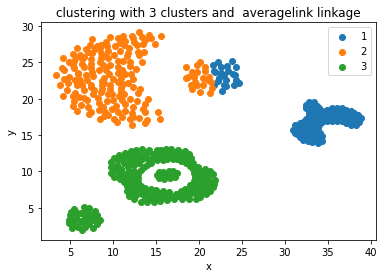

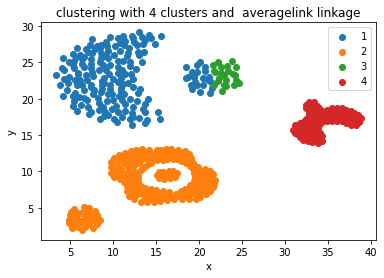

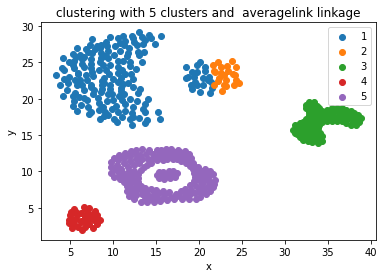

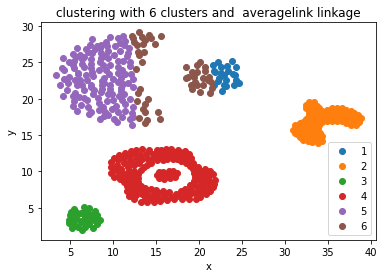

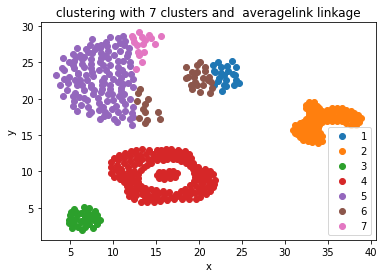

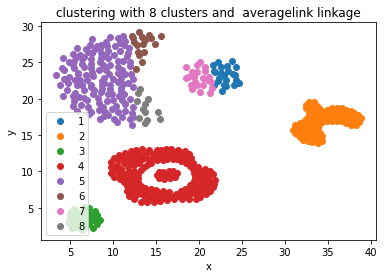

[+] clustering with complete-link linkage




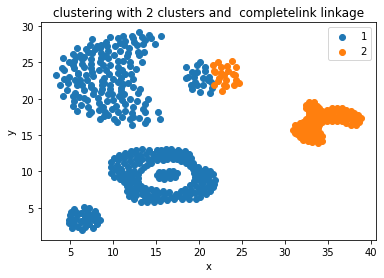

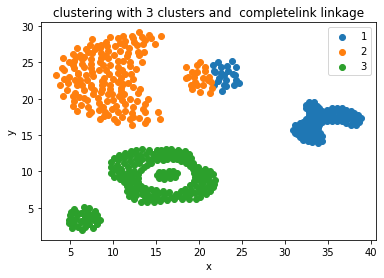

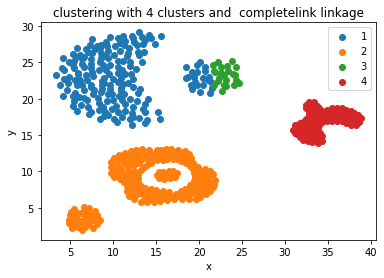

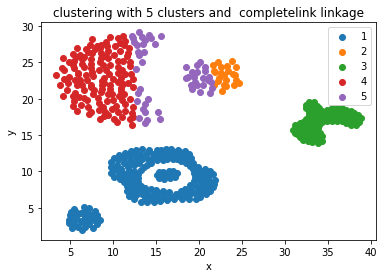

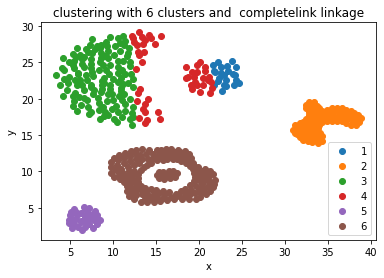

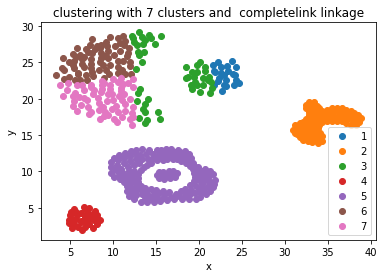

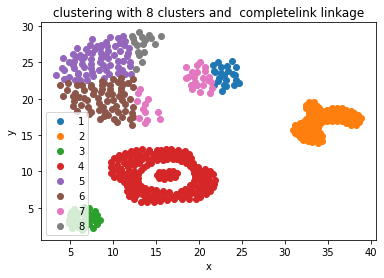

In [525]:
q3_nodes = np.array(q3_dataset.copy())
print(f'[+] clustering with single-link linkage\n\n')
top_down_clustering(q3_nodes.copy(), 'single')
print(f'[+] clustering with average-link linkage\n\n')
top_down_clustering(q3_nodes.copy(), 'average')
print(f'[+] clustering with complete-link linkage\n\n')
top_down_clustering(q3_nodes.copy(), 'complete')

### The effect of distance methods is not really noticeable in this case in divisive clustering and all of them work almost the same and fine.